In [15]:
import sympy, numpy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols
from sympy import simplify, expand, collect, solve, solveset, lambdify
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from google.colab import files

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $16x^2-21y^2+3z^2-4xy-4xz+10yz$, проверить, что она определяет именно заданный многочлен.

In [8]:
from sympy.abc import x, y, z

f = 16 * x**2 - 21 * y**2 + 3 * z**2 - 4 * x * y - 4 * x * z + 10 * y * z
A = Matrix([[16, -2, -2],
            [-2, -21, 5],
            [-2, 5, 3]])

X = Matrix([x, y, z])
res = X.T * A * X
quadr_form = simplify(expand(res[0]))

display(Latex(f'X^T A X = {latex(quadr_form)}'))
display(Latex(f'X^T A X - f = {latex(quadr_form - f)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Заданы векторы  $e_1=(1, 0, 1)$, $e_2=(-1, 0, 1)$, $e_1=(0, 1, 0)$.
Вывести (используя цикл!) на экран матрицу квадратичной формы Задания 1 в новом базисе из векторов


1.   ($e_1$, $e_2$, $e_3$),
2.   ($e_1$, $e_2 - e_1$, $e_3$),
3.   ($e_1$, $e_2$, $e_3 - e_1$),
4.   ($e_1$, $e_2 - e_1$, $e_3 - e_1$),
5.   ($e_1 + e_2$, $e_2$, $e_3 + e_2$),

при этом в файл "task2.xlsx" записать на листы $A_1$, $A_2$, ... матрицы в новом базисе, а на листы  $P_1$, $P_2$, ... соответствующие матрицы перехода.

In [9]:
A = Matrix([[16, -2, -2],
            [-2, -21, 5],
            [-2, 5, 3]])

e1 = Matrix([1, 0, 1])
e2 = Matrix([-1, 0, 1])
e3 = Matrix([0, 1, 0])

bases = [(e1, e2, e3),
         (e1, e2 - e1, e3),
         (e1, e2, e3 - e1),
         (e1, e2 - e1, e3 - e1),
         (e1 + e2, e2, e3 + e2)]

for i, basis_vectors in enumerate(bases, start=1):
    P = Matrix.hstack(*basis_vectors).T
    A_new = P.T * A * P
    A_new = A_new.applyfunc(lambda x: float(x))
    P = P.applyfunc(lambda x: float(x))

    print(f'Matrix A{i} in the new basis:')
    display(A_new)
    print(f'Matrix P{i} of the transition:')
    display(P)

    with pd.ExcelWriter("task2.xlsx") as writer:
      index = 1
      for row in A_new.tolist():
        df = pd.DataFrame(row)
        df.to_excel(writer, sheet_name=f"A{index}", index=False, header=False)
        index += 1

      index = 1
      for row in P.tolist():
        df = pd.DataFrame(row)
        df.to_excel(writer, sheet_name=f"P{index}", index=False, header=False)
        index+=1

Matrix A1 in the new basis:


Matrix([
[-1.0, -7.0, 37.0],
[-7.0,  3.0,  3.0],
[37.0,  3.0, -9.0]])

Matrix P1 of the transition:


Matrix([
[ 1.0,   0, 1.0],
[-1.0,   0, 1.0],
[   0, 1.0,   0]])

Matrix A2 in the new basis:


Matrix([
[-60.0, -12.0, 20.0],
[-12.0,   3.0, -2.0],
[ 20.0,  -2.0, 16.0]])

Matrix P2 of the transition:


Matrix([
[ 1.0,   0, 1.0],
[-2.0,   0,   0],
[   0, 1.0,   0]])

Matrix A3 in the new basis:


Matrix([
[ 16.0, -10.0,  44.0],
[-10.0,   3.0,     0],
[ 44.0,     0, -12.0]])

Matrix P3 of the transition:


Matrix([
[ 1.0,   0,  1.0],
[-1.0,   0,  1.0],
[-1.0, 1.0, -1.0]])

Matrix A4 in the new basis:


Matrix([
[-33.0, -15.0, 37.0],
[-15.0,   3.0, -5.0],
[ 37.0,  -5.0, 23.0]])

Matrix P4 of the transition:


Matrix([
[ 1.0,   0,  1.0],
[-2.0,   0,    0],
[-1.0, 1.0, -1.0]])

Matrix A5 in the new basis:


Matrix([
[-8.0, -8.0, 16.0],
[-8.0,  3.0,  4.0],
[16.0,  4.0, 40.0]])

Matrix P5 of the transition:


Matrix([
[   0,   0, 2.0],
[-1.0,   0, 1.0],
[-1.0, 1.0, 1.0]])

### Задание 3.
В цикле из файла "task3.xlsx" считать матрицы, вывести на экран каждую матрицу и ее собственные числа и собственные векторы.

In [11]:
from openpyxl import load_workbook

wb = load_workbook('task3.xlsx')
for sheet in wb.sheetnames:
    ws = wb[sheet]
    # Считываем данные для матрицы из листа
    matrix_data = [[cell.value for cell in row] for row in ws.iter_rows()]

    # Создаём матрицу
    matrix = Matrix(matrix_data)

    # Вычисляем собственные числа и собственные векторы
    eigensystem = matrix.eigenvects()
    print(f'Матрица на листе {sheet}:')
    display(matrix)

    print('\nСобственные числа и собственные векторы:')
    for eigenvalue, multiplicity, eigenvectors in eigensystem:
        print(f'Собственное число: {eigenvalue}')
        print('Собственные векторы:')
        for eigenvector in eigenvectors:
            display(eigenvector)
        print()
wb.close()

Матрица на листе A1:


Matrix([
[  7, 37, -37],
[ 37, -5,   5],
[-37,  5,  -5]])


Собственные числа и собственные векторы:
Собственное число: 0
Собственные векторы:


Matrix([
[0],
[1],
[1]])


Собственное число: -3/2 + 3*sqrt(1249)/2
Собственные векторы:


Matrix([
[-3*sqrt(1249)/74 - 17/74],
[                      -1],
[                       1]])


Собственное число: -3*sqrt(1249)/2 - 3/2
Собственные векторы:


Matrix([
[-17/74 + 3*sqrt(1249)/74],
[                      -1],
[                       1]])


Матрица на листе A2:


Matrix([
[  7,  30, -37],
[ 30, -72,  42],
[-37,  42,  -5]])


Собственные числа и собственные векторы:
Собственное число: 0
Собственные векторы:


Matrix([
[1],
[1],
[1]])


Собственное число: -35 + sqrt(5437)
Собственные векторы:


Matrix([
[-sqrt(5437)/79 - 12/79],
[-67/79 + sqrt(5437)/79],
[                     1]])


Собственное число: -sqrt(5437) - 35
Собственные векторы:


Matrix([
[-12/79 + sqrt(5437)/79],
[-sqrt(5437)/79 - 67/79],
[                     1]])


Матрица на листе A3:


Matrix([
[  7,  37, -44],
[ 37,  -5, -32],
[-44, -32,  76]])


Собственные числа и собственные векторы:
Собственное число: 0
Собственные векторы:


Matrix([
[1],
[1],
[1]])


Собственное число: 39 - 21*sqrt(13)
Собственные векторы:


Matrix([
[ 23/4 + 7*sqrt(13)/4],
[-27/4 - 7*sqrt(13)/4],
[                   1]])


Собственное число: 39 + 21*sqrt(13)
Собственные векторы:


Matrix([
[ 23/4 - 7*sqrt(13)/4],
[-27/4 + 7*sqrt(13)/4],
[                   1]])


Матрица на листе A4:


Matrix([
[  7,  30, -44],
[ 30, -72,  12],
[-44,  12,  76]])


Собственные числа и собственные векторы:
Собственное число: 0
Собственные векторы:


Matrix([
[2],
[1],
[1]])


Собственное число: 11/2 - sqrt(33817)/2
Собственные векторы:


Matrix([
[117/136 + sqrt(33817)/136],
[ -185/68 - sqrt(33817)/68],
[                        1]])


Собственное число: 11/2 + sqrt(33817)/2
Собственные векторы:


Matrix([
[117/136 - sqrt(33817)/136],
[ -185/68 + sqrt(33817)/68],
[                        1]])


Матрица на листе A5:


Matrix([
[76, 32, 0],
[32, -5, 0],
[ 0,  0, 0]])


Собственные числа и собственные векторы:
Собственное число: 0
Собственные векторы:


Matrix([
[0],
[0],
[1]])


Собственное число: 71/2 - sqrt(10657)/2
Собственные векторы:


Matrix([
[81/64 - sqrt(10657)/64],
[                     1],
[                     0]])


Собственное число: 71/2 + sqrt(10657)/2
Собственные векторы:


Matrix([
[81/64 + sqrt(10657)/64],
[                     1],
[                     0]])

### Задание 4.
Привести квадратичную форму с матрицей
$$
\left[\begin{matrix}-645 & -12 & -960\\-12 & 3 & 9\\-960 & 9 & -1205\end{matrix}\right]
$$
к каноническому виду с помощью перехода к новому базису из собственных векторов.

Вывести на экран матрицу перехода к новому базису, матрицу квадратичной формы в новом базисе и квадратичную форму в старом и новом базисе (в виде многочлена от переменных $x$, $y$, $z$).

In [12]:
A = Matrix([[-645, -12, -960],
            [-12, 3, 9],
            [-960, 9, -1205]])

# Собственные значения и собственные векторы
eigenvals = A.eigenvals()
eigenvects = A.eigenvects()

# Матрица новго базиса
S = Matrix.hstack(*[vect[2][0] for vect in eigenvects])
D = S.T * A * S

x, y, z = symbols('x y z')
v = Matrix([x, y, z])

Q_old = v.T * A * v
Q_new = v.T * D * v

print("Матрица перехода к новому базису:")
display(S)
print("\nМатрица квадратичной формы в новом базисе:")
display(D)
print("\nКвадратичная форма в старом базисе:")
display(Q_old[0])
print("\nКвадратичная форма в новом базисе:")
display(Q_new[0])

Матрица перехода к новому базису:


Matrix([
[3/4,  -4/3, -4/3],
[  0, -25/3,  1/3],
[  1,     1,    1]])


Матрица квадратичной формы в новом базисе:


Matrix([
[-48125/16, 0,     0],
[        0, 0,     0],
[        0, 0, 676/3]])


Квадратичная форма в старом базисе:


x*(-645*x - 12*y - 960*z) + y*(-12*x + 3*y + 9*z) + z*(-960*x + 9*y - 1205*z)


Квадратичная форма в новом базисе:


-48125*x**2/16 + 676*z**2/3

### Задание 5*.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

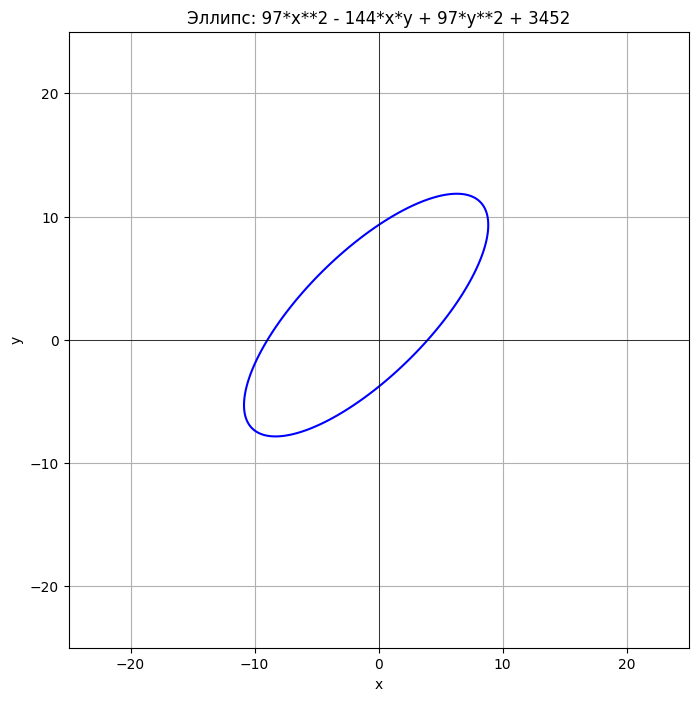

In [16]:
x, y = symbols('x y')
eq = 97*x**2 - 144*x*y + 97*y**2 + 482*x - 532*y - 3452

A = Matrix([[97, -72], [-72, 97]])
B = Matrix([[482], [-532]])
C = -3452

# Собственные векторы
eigenvects = A.eigenvects()

# Матрицу перехода
eigen_info = [(val[0], val[2][0].normalized()) for val in eigenvects]
P = Matrix.hstack(*(eigen_info[i][1] for i in range(len(eigen_info))))

P_T = P.T
P_inv = P.inv()

# Новый базис и квадратичная форма
new_coords = P_T * Matrix([x, y])
new_quadratic_form = expand(new_coords.T * P_T * A * P * new_coords)

# Каноническое уравнение
canonical_eq = new_quadratic_form[0] - C

# Типа кривой
curve_type = 'Гипербола' if eigen_info[0][0]*eigen_info[1][0] < 0 else 'Эллипс'


f = lambdify((x, y), eq, "numpy")
canonical_f = lambdify((x, y), canonical_eq, "numpy")


x_vals = numpy.linspace(-25, 25, 400)
y_vals = numpy.linspace(-25, 25, 400)
X, Y = numpy.meshgrid(x_vals, y_vals)
Z = f(X, Y)
canonical_Z = canonical_f(X, Y)


plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, levels=[0], colors='blue')
plt.contour(X, Y, canonical_Z, levels=[0], colors='red', linestyles='dashed')
plt.title(f"{curve_type}: {canonical_eq}")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.show()

### Задание 6*.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика.

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

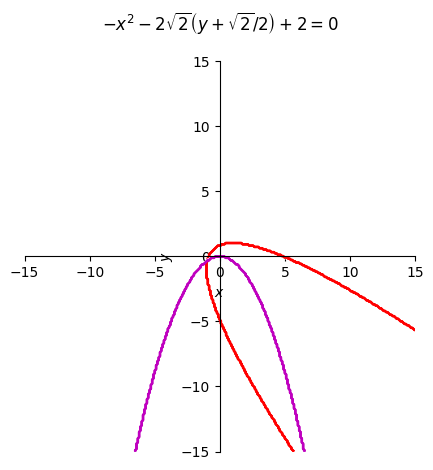

In [17]:
A = Matrix([[1, 1, -2],
            [1, 1, 2],
            [-2, 2, -4]])

x, y = symbols('x y')

X = Matrix([x, y, 1])
eq = Eq((X.T * A * X)[0], 0)

alpha = sympy.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2

P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])

A_new = P.T * A * P
X_new = Matrix([x, y + 1 / sympy.sqrt(2), 1])

eq_new = (X_new.T * A_new * X_new)[0]
eq_last = eq_new / (-2)

p = plot_implicit(eq, (x, -15, 15), (y, -15, 15), line_color='r', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$',
                  title=f'{latex(Eq(eq_last, 0), mode="inline")}\n',
                  adaptive=False, show=False)
p.append(plot_implicit(eq_last, (x, -15, 15), (y, -15, 15), line_color='m',
                       aspect_ratio=(1, 1), adaptive=False, show=False)[0])
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

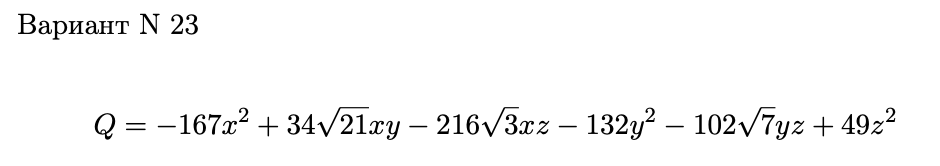

In [18]:
x, y, z = symbols('x y z')
A = Matrix([[-167, 17 * sympy.sqrt(21), -108 * sympy.sqrt(3)],
            [17 * sympy.sqrt(21), -132, -51 * sympy.sqrt(7)],
            [-108 * sympy.sqrt(3), -51 * sympy.sqrt(7), 49]])

display(Latex(f"Матрица квадратичной формы в старом базисе:{latex(A)}"))
X = Matrix([x, y, z])
f = (X.T * A * X)[0].simplify()

# Cобственные векторы и матрица перехода
res = A.eigenvects()
v1 = res[0][2][0]
v2 = res[1][2][0]
v3 = res[2][2][0]
P = v1.row_join(v2).row_join(v3)

display(Latex(f"Матрица перехода:{latex(P)}"))

A_new = P ** (-1) * A * P
g = (X.T * A_new * X)[0].simplify()

display(Latex(f"Матрица\ квадратичной\ формы\ в\ новом\ базисе:{latex(A_new)}"))
display(Latex(f"Квадратичная\ форма\ в\ старом\ базисе:{latex(f)}"))
display(Latex(f"Квадратичная\ форма\ в\ новом\ базисе:{latex(g)}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>